Image reconstruction using PCA

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import os
import numpy as np

In [3]:


filenames = []
images = []

for filename in os.listdir('/Users/vinayaksoni/Downloads/images/faces/'):
    filenames.append(filename)
    image = np.array(Image.open(os.path.join('/Users/vinayaksoni/Downloads/images/faces/', filename)))
    images.append(image)

images = np.array(images)

print('Total Number of Faces: {}'.format(len(images)))
print(images.shape)

X = images.reshape(13233, 64*64)
print(X.shape)

Total Number of Faces: 13233
(13233, 64, 64)
(13233, 4096)


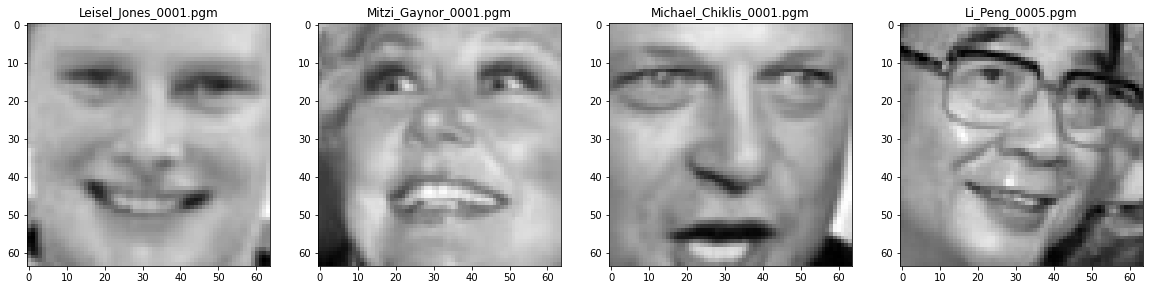

In [4]:
plt.figure(figsize=(20, 10))
num_images = 4
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

In [5]:
covariance = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance)

In [6]:
eigen_pair = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pair.sort(key=lambda x: x[0], reverse=True)

In [7]:
keep_variance=0.99

required_variance = keep_variance * sum(eigenvalues)

required_dim = 0
variance = 0
for i in range(len(eigen_pair)):
    variance += eigen_pair[i][0]
    if variance >= required_variance:
        required_dim = i + 1
        break

print('Total Dimensions: {}'.format(len(eigen_pair)))
print('Required Dimensions: {}'.format(required_dim))

Total Dimensions: 4096
Required Dimensions: 577


In [8]:
projection_matrix = np.empty(shape=(X.shape[1], required_dim))

for index in range(required_dim):
    eigenvector = eigen_pair[index][1]
    projection_matrix[:, index] = eigenvector

print('Projection Matrix Shape: \n {}'.format(projection_matrix.shape))

Projection Matrix Shape: 
 (4096, 577)


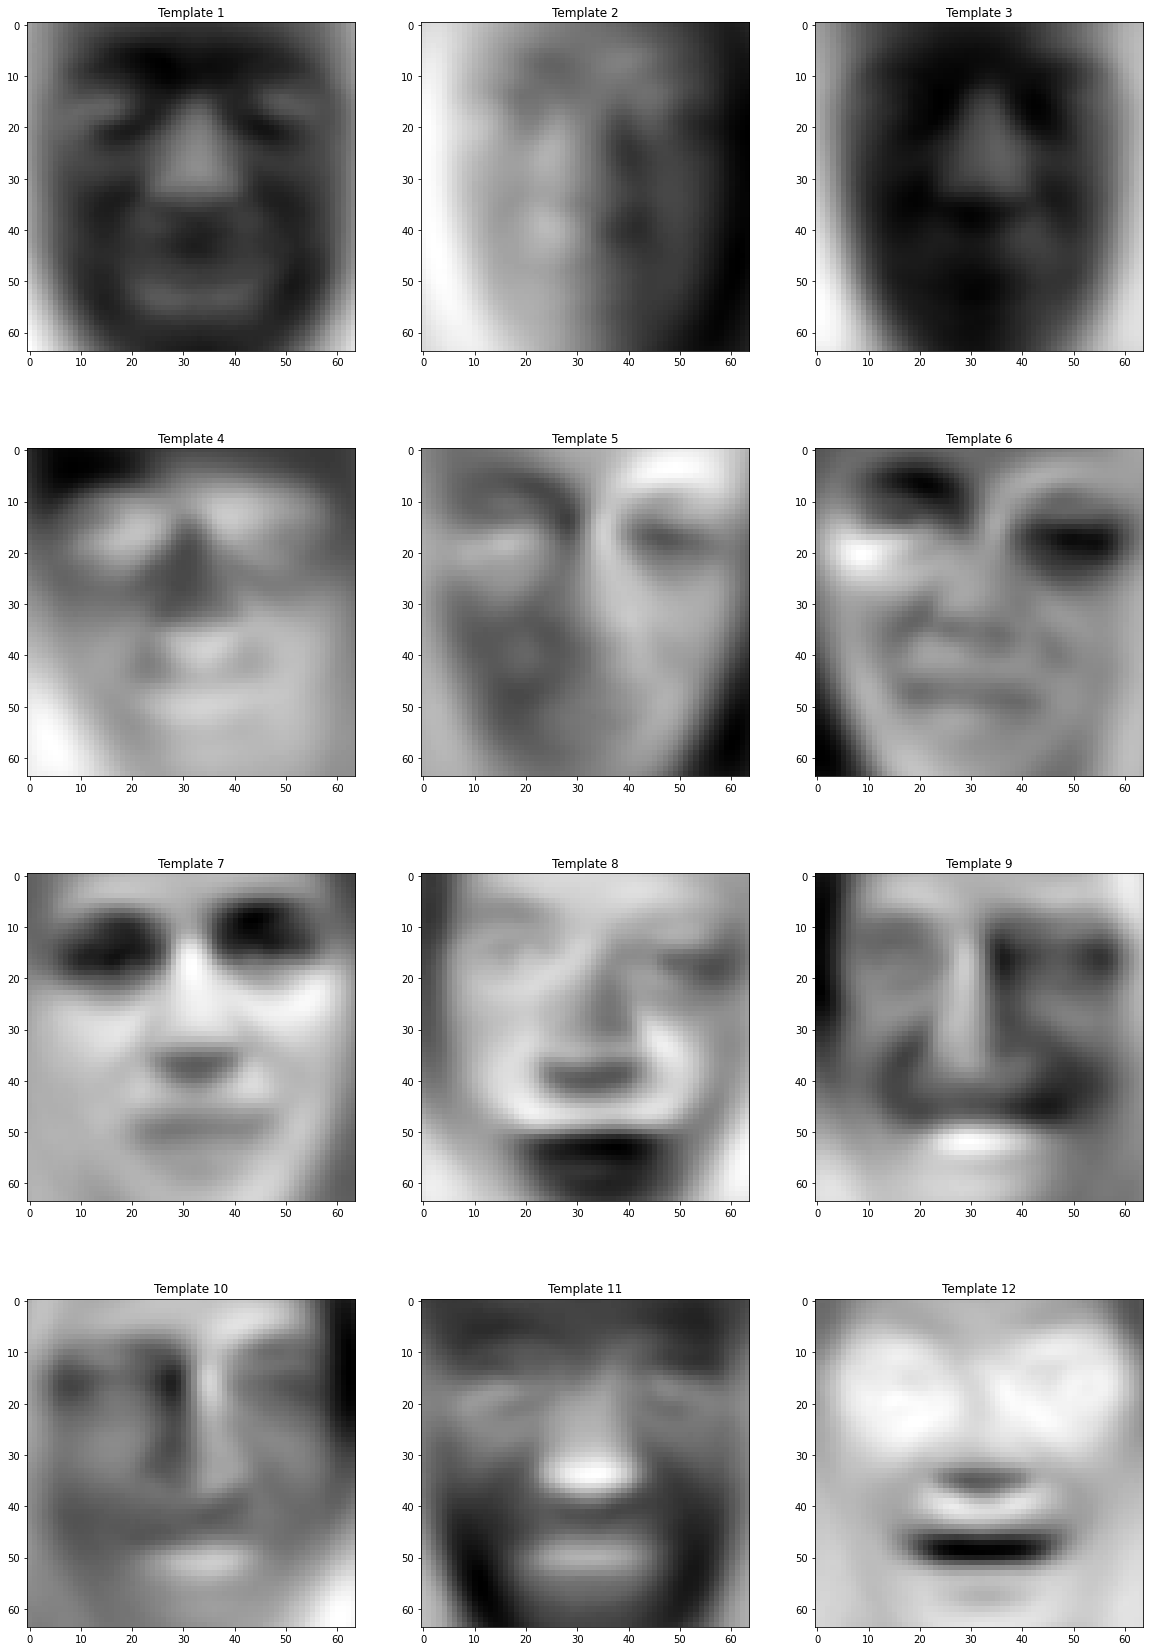

In [9]:
basis = projection_matrix.reshape(64, 64, required_dim)

plt.figure(figsize=(20, 30))

for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(basis[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

In [10]:
projected_data = X.dot(projection_matrix)  # (13233, 577)

print(projected_data.shape)

(13233, 577)


Label Colleen_Donovan_0001.pgm


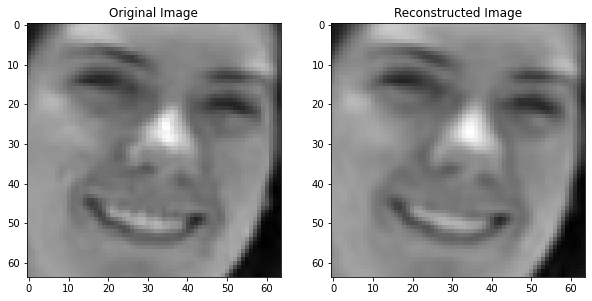

In [11]:
import random

# index of the image to reconstruct
index = random.randint(0,13233)

projected_image= np.expand_dims(projected_data[index], 0)  # (1, num_dims)

# Matrix multiply projected_image(1, num_dims) with projection_matrix transposed(num_dims, 784)
reconstructed_image = projected_image.dot(projection_matrix.T)  # (1, 784)
reconstructed_image = reconstructed_image.reshape(64, 64)

print('Label {}'.format(filenames[index]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, 'gray')